In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Data 1

In [2]:
# Read in
df1 = pd.read_csv('../data/df1.csv')

In [3]:
# Inspect
df1.head()

,x,y
0,3.824188,2.061158
1,3.479966,2.644357
2,4.173468,3.748112
3,3.909048,4.161936
4,2.428279,3.603281


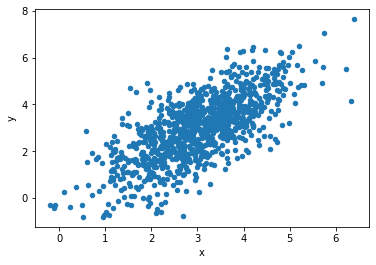

In [4]:
# Plot
df1.plot('x', 'y', kind='scatter')

In [5]:
# Fit simple decision tree with one split
X, y = df1[['x']].to_numpy(), df1['y']
tree1 = DecisionTreeRegressor(
    max_depth=1,
    random_state=666
).fit(X, y)

<Figure size 432x288 with 0 Axes>

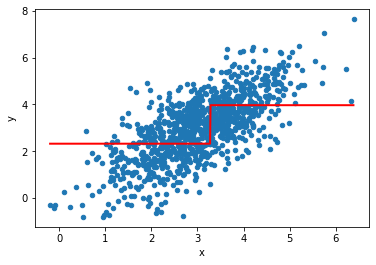

In [6]:
# Visualize
X_mesh = np.arange(X.min(), X.max(), .01)[:, np.newaxis]
y1 = tree1.predict(X_mesh)

plt.figure()
df1.plot('x', 'y', kind='scatter')
plt.plot(X_mesh, y1, color='red',linewidth=2)
plt.show()

[Text(167.4, 163.07999999999998, 'X[0] <= 3.277\nmse = 1.924\nsamples = 1000\nvalue = 2.965'),
 Text(83.7, 54.360000000000014, 'mse = 1.384\nsamples = 610\nvalue = 2.323'),
 Text(251.10000000000002, 54.360000000000014, 'mse = 1.116\nsamples = 390\nvalue = 3.969')]

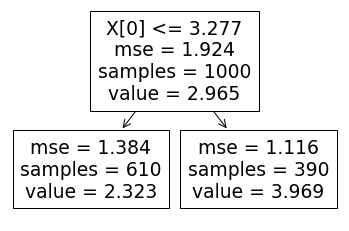

In [7]:
# Look at the tree itself
plot_tree(tree1)

So we split a little bit right of the middle.  Here we're minimizing mean squared error, the default for this type of regressor, and it definitely looks like the nodes have less MSE than the overall data set (i.e 1.1 and 1.4 versus 1.9).

What happens when we add an additional layer?

In [8]:
tree1_depth2 = DecisionTreeRegressor(
    max_depth=2,
    random_state=666
).fit(X, y)

<Figure size 432x288 with 0 Axes>

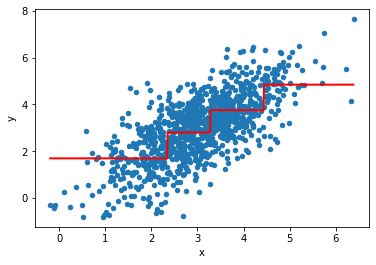

In [9]:
# Visualize
X_mesh = np.arange(X.min(), X.max(), .01)[:, np.newaxis]
y1_depth2 = tree1_depth2.predict(X_mesh)

plt.figure()
df1.plot('x', 'y', kind='scatter')
plt.plot(X_mesh, y1_depth2, color='red',linewidth=2)
plt.show()

[Text(279.0, 271.8, 'X[0] <= 3.277\nmse = 1.924\nsamples = 1000\nvalue = 2.965'),
 Text(139.5, 163.08, 'X[0] <= 2.351\nmse = 1.384\nsamples = 610\nvalue = 2.323'),
 Text(69.75, 54.360000000000014, 'mse = 1.275\nsamples = 264\nvalue = 1.696'),
 Text(209.25, 54.360000000000014, 'mse = 0.939\nsamples = 346\nvalue = 2.801'),
 Text(418.5, 163.08, 'X[0] <= 4.439\nmse = 1.116\nsamples = 390\nvalue = 3.969'),
 Text(348.75, 54.360000000000014, 'mse = 0.913\nsamples = 314\nvalue = 3.757'),
 Text(488.25, 54.360000000000014, 'mse = 0.999\nsamples = 76\nvalue = 4.847')]

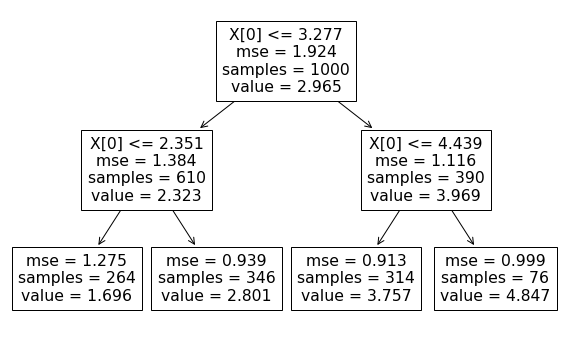

In [10]:
# Look at the tree itself
plt.figure(figsize=(10, 6))
plot_tree(tree1_depth2)

So we further split each of the original nodes.  We still have some sample in each "leaf", with the lowest being 76 on the far right.  Again, overall we see a drop in MSE across all nondes relative to the parent nodes.

Let's go one more layer.

In [11]:
tree1_depth3 = DecisionTreeRegressor(
    max_depth=3,
    random_state=666
).fit(X, y)

<Figure size 432x288 with 0 Axes>

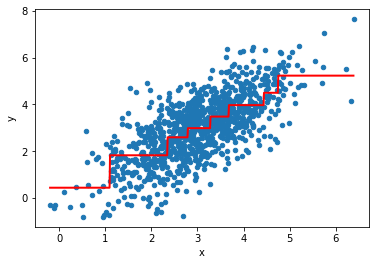

In [12]:
# Visualize
X_mesh = np.arange(X.min(), X.max(), .01)[:, np.newaxis]
y1_depth3 = tree1_depth3.predict(X_mesh)

plt.figure()
df1.plot('x', 'y', kind='scatter')
plt.plot(X_mesh, y1_depth3, color='red',linewidth=2)
plt.show()

[Text(362.7, 475.65000000000003, 'X[0] <= 3.277\nmse = 1.924\nsamples = 1000\nvalue = 2.965'),
 Text(181.35, 339.75, 'X[0] <= 2.351\nmse = 1.384\nsamples = 610\nvalue = 2.323'),
 Text(90.675, 203.85000000000002, 'X[0] <= 1.104\nmse = 1.275\nsamples = 264\nvalue = 1.696'),
 Text(45.3375, 67.94999999999999, 'mse = 1.112\nsamples = 25\nvalue = 0.441'),
 Text(136.0125, 67.94999999999999, 'mse = 1.11\nsamples = 239\nvalue = 1.827'),
 Text(272.025, 203.85000000000002, 'X[0] <= 2.79\nmse = 0.939\nsamples = 346\nvalue = 2.801'),
 Text(226.6875, 67.94999999999999, 'mse = 0.932\nsamples = 164\nvalue = 2.596'),
 Text(317.3625, 67.94999999999999, 'mse = 0.873\nsamples = 182\nvalue = 2.987'),
 Text(544.05, 339.75, 'X[0] <= 4.439\nmse = 1.116\nsamples = 390\nvalue = 3.969'),
 Text(453.375, 203.85000000000002, 'X[0] <= 3.682\nmse = 0.913\nsamples = 314\nvalue = 3.757'),
 Text(408.03749999999997, 67.94999999999999, 'mse = 0.845\nsamples = 138\nvalue = 3.482'),
 Text(498.7125, 67.94999999999999, 'mse =

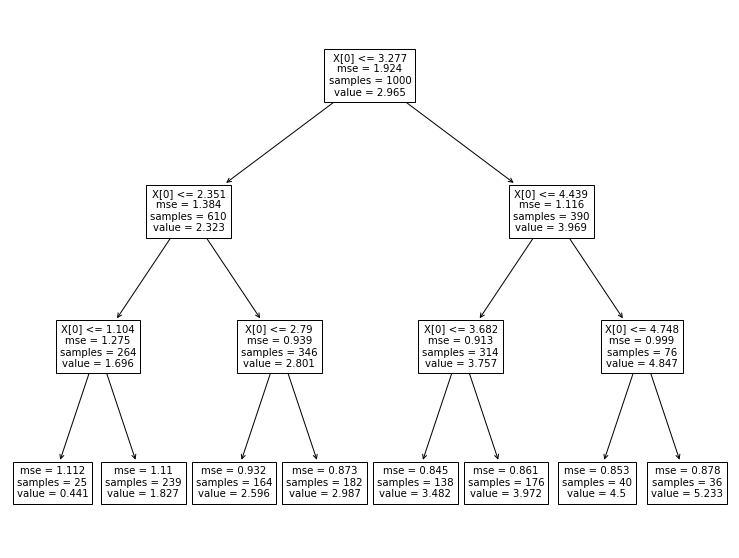

In [13]:
# Look at the tree itself
plt.figure(figsize=(13, 10))
plot_tree(tree1_depth3)

Now we're seeing very few observations in some of these splits (e.g. 25 at the far left, with 36 and 40 on the far right).  Which should start to make us concerned about the extendability of our model to new data.

Let's do a quick comparison of this state of the model with the simple regression we built previously.

In [14]:
# Fit a simple regression model
reg1 = smf.ols(
    formula='y ~ x',
    data=df1
).fit()

<Figure size 432x288 with 0 Axes>

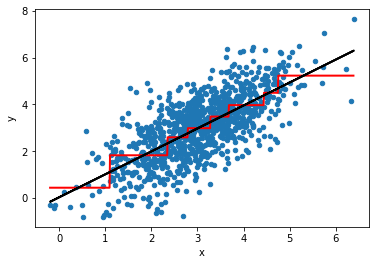

In [15]:
# Visualize
X_mesh = np.arange(X.min(), X.max(), .01)[:, np.newaxis]
y1_reg = reg1.predict(df1)

plt.figure()
df1.plot('x', 'y', kind='scatter')
plt.plot(X_mesh, y1_depth3, color='red',linewidth=2)
plt.plot(df1['x'], y1_reg, color='black',linewidth=2)
plt.show()

It looks like our tree is creating a jagged fit of the best fit line from OLS.  Not a terrible job, but it is approximate.  And, effectively, is just taking an average y-value within a particular bin of x-values.  One way to think about this is that our tree approximates a continuous relationship between two variables.

There are a few conceptual ways to describe the philosophical differences between these types of models, some helpful ways being:

- **Continuous** learners (e.g. regression) versus **discrete** learners (e.g. trees)
- **High bias** learners (i.e. the model assumes that world exists in a certain way, which regression does) versus **high variance** learners (i.e. the model depends a lot on the specific data being used).

Let's illustrate this later point by adding some random noise to y and re-fitting both models.

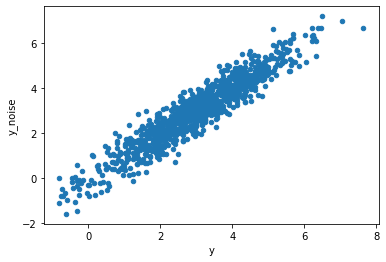

In [16]:
np.random.seed(41)
df1['y_noise'] = df1['y'] + np.random.normal(0, 0.5, size=1000)

# Plot y versus y_noise
df1.plot('y', 'y_noise', kind='scatter')

Very correlated, so we wouldn't expect the models to be much different.

In [17]:
# Refit tree
tree1_depth3_ynoise = DecisionTreeRegressor(
    max_depth=3,
    random_state=666
).fit(X, df1['y_noise'])

In [18]:
# Refit regression
reg1_ynoise = smf.ols(
    formula='y_noise ~ x',
    data=df1
).fit()

<Figure size 432x288 with 0 Axes>

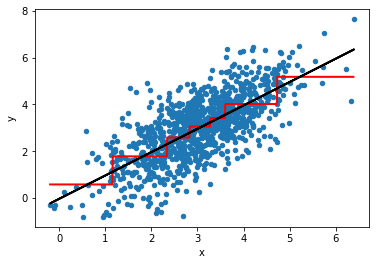

In [19]:
# Visualize
X_mesh = np.arange(X.min(), X.max(), .01)[:, np.newaxis]
y1_depth3_ynoise = tree1_depth3_ynoise.predict(X_mesh)
y1_reg_ynoise = reg1_ynoise.predict(df1)

plt.figure()
df1.plot('x', 'y', kind='scatter')
plt.plot(X_mesh, y1_depth3_ynoise, color='red',linewidth=2)
plt.plot(df1['x'], y1_reg_ynoise, color='black',linewidth=2)
plt.show()

Looks similar overall, so instead let's compare the regression fits and the tree fits separately

<Figure size 432x288 with 0 Axes>

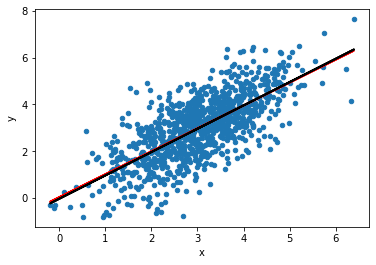

In [20]:
# Regression fits
plt.figure()
df1.plot('x', 'y', kind='scatter')
plt.plot(df1['x'], y1_reg, color='red', linewidth=2, label='original fit')
plt.plot(df1['x'], y1_reg_ynoise, color='black', linewidth=2, label='noise fit')
plt.show()

<Figure size 432x288 with 0 Axes>

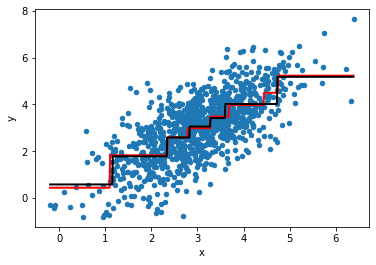

In [21]:
# Tree fits
plt.figure()
df1.plot('x', 'y', kind='scatter')
plt.plot(X_mesh, y1_depth3, color='red', linewidth=2, label='original fit')
plt.plot(X_mesh, y1_depth3_ynoise, color='black', linewidth=2, label='noise fit')
plt.show()

The regresion lines are basically identical.  The tree results are similar but different in a few pockets of values (e.g. around x=4.5).  Here the magnitude of the effect isn't huge, but there are times that it can be if you aren't careful!

Let's go extreme and fit a tree with max depth of 10 and see how that compares to the regression.

<Figure size 432x288 with 0 Axes>

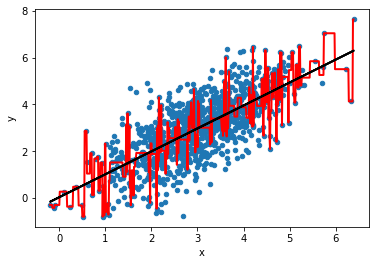

In [22]:
tree1_depth10 = DecisionTreeRegressor(
    max_depth=10,
    random_state=666
).fit(X, y)

# Visualize
X_mesh = np.arange(X.min(), X.max(), .01)[:, np.newaxis]
y1_depth10 = tree1_depth10.predict(X_mesh)

plt.figure()
df1.plot('x', 'y', kind='scatter')
plt.plot(X_mesh, y1_depth10, color='red',linewidth=2)
plt.plot(df1['x'], y1_reg, color='black',linewidth=2)
plt.show()

Yuck, am I right?  Try explaining the underlying process that creates that data!

# Data 2

In [23]:
# Read in
df2 = pd.read_csv('../data/df2.csv')

In [24]:
# Inspect
df2.head()

,x,y
0,2.206877,2.529905
1,4.028246,3.340645
2,3.288655,2.912197
3,5.205833,2.724151
4,4.435430,3.009394


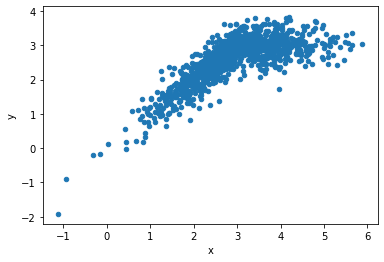

In [25]:
# Plot
df2.plot('x', 'y', kind='scatter')

In [26]:
# Fit simple decision tree with one split
X, y = df2[['x']].to_numpy(), df2['y']
tree2 = DecisionTreeRegressor(
    max_depth=1,
    random_state=666
).fit(X, y)

<Figure size 432x288 with 0 Axes>

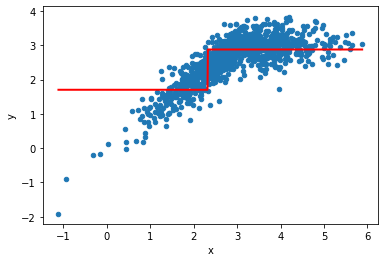

In [27]:
# Visualize
X_mesh = np.arange(X.min(), X.max(), .01)[:, np.newaxis]
y2 = tree2.predict(X_mesh)

plt.figure()
df2.plot('x', 'y', kind='scatter')
plt.plot(X_mesh, y2, color='red',linewidth=2)
plt.show()

Seems to try to catch that "elbow" poinit we previously dealt with, but not as elegantly as regression did (once we figured out how to make the math work out).

Let's jump to depth 3 and see how it fits.

In [28]:
# Fit simple decision tree with one split
tree2_depth3 = DecisionTreeRegressor(
    max_depth=3,
    random_state=666
).fit(X, y)

<Figure size 432x288 with 0 Axes>

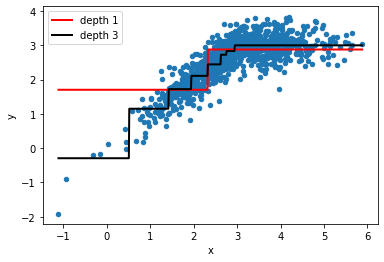

In [29]:
# Visualize
X_mesh = np.arange(X.min(), X.max(), .01)[:, np.newaxis]
y2_depth3 = tree2_depth3.predict(X_mesh)

plt.figure()
df2.plot('x', 'y', kind='scatter')
plt.plot(X_mesh, y2, color='red', linewidth=2, label='depth 1')
plt.plot(X_mesh, y2_depth3, color='black', linewidth=2, label='depth 3')
plt.legend()
plt.show()

[Text(362.7, 475.65000000000003, 'X[0] <= 2.323\nmse = 0.479\nsamples = 1000\nvalue = 2.565'),
 Text(181.35, 339.75, 'X[0] <= 1.427\nmse = 0.384\nsamples = 267\nvalue = 1.704'),
 Text(90.675, 203.85000000000002, 'X[0] <= 0.513\nmse = 0.436\nsamples = 63\nvalue = 0.967'),
 Text(45.3375, 67.94999999999999, 'mse = 0.524\nsamples = 8\nvalue = -0.293'),
 Text(136.0125, 67.94999999999999, 'mse = 0.159\nsamples = 55\nvalue = 1.15'),
 Text(272.025, 203.85000000000002, 'X[0] <= 1.939\nmse = 0.149\nsamples = 204\nvalue = 1.932'),
 Text(226.6875, 67.94999999999999, 'mse = 0.114\nsamples = 94\nvalue = 1.722'),
 Text(317.3625, 67.94999999999999, 'mse = 0.109\nsamples = 110\nvalue = 2.111'),
 Text(544.05, 339.75, 'X[0] <= 2.75\nmse = 0.145\nsamples = 733\nvalue = 2.879'),
 Text(453.375, 203.85000000000002, 'X[0] <= 2.627\nmse = 0.134\nsamples = 163\nvalue = 2.535'),
 Text(408.03749999999997, 67.94999999999999, 'mse = 0.119\nsamples = 111\nvalue = 2.446'),
 Text(498.7125, 67.94999999999999, 'mse = 0.

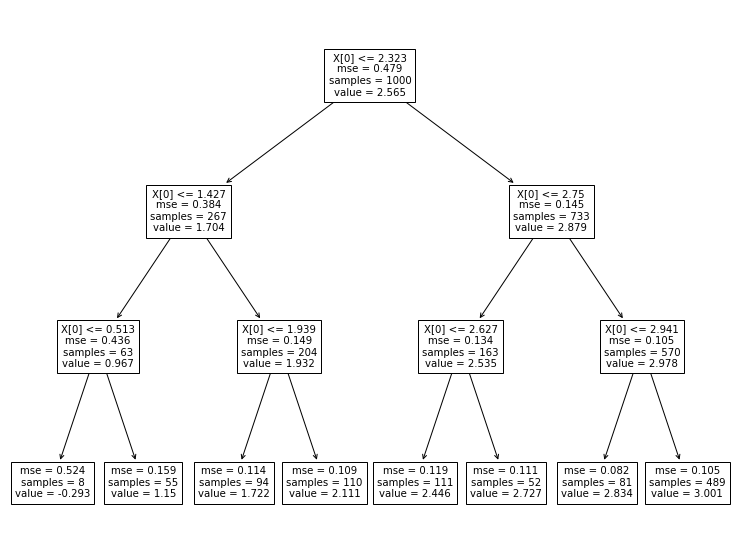

In [30]:
# Look at the tree itself
plt.figure(figsize=(13, 10))
plot_tree(tree2_depth3)

A few things stick out from the plot above and this tree structure, the main being that creating a symmetric tree is causing some sub-optimal behavior.  For example:

- We have 8 samples in our far left tree, which is likely noisy and hence can mess with a high variance model like decision trees.
- The tree is spending less effort than it probably should teasing out the linear relationship up until ~x=3

Thankfully trees have some optional for dealing with this!

- **Requiring a specific sample size to create a split**.  This can manifest in a few specific ways (e.g. requiring a specific number of points to to split a node, or requiring a specific number of points in each leaf).
    - In this algorithm, this is governed by parameters like `min_samples_split` and `min_samples_leaf`
- **Requiring a specific drop in our accuracy measure to create a split**.
    - In this algorithm, this is governed by parameters like `min_impurity_decrease`
- **Specifying how many leaves you want to build instead of the depth of the tree you want**.  This effectively asks the tree to prioritize splits based on where we see the most return on building that additional split.
    - In this algorithm, this is governed by `max_leaf_nodes`

And, of course, there other techniques like regularization we can do on a built tree to remove (called "pruning") splits that we don't think will generalize to new data.  But we'll save that for later.

For now, let's test two of these parameters:

- min_samples_leaf (keep at depth=3 but require at least 5% of the data in each leaf)
- max_leaf_nodes (vary from 2 to 8 and compare the fits)

### Min samples leaf

<Figure size 432x288 with 0 Axes>

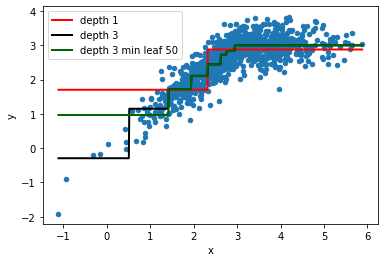

In [31]:
# Fit 
tree2_depth3_minleaf50 = DecisionTreeRegressor(
    max_depth=3,
    min_samples_leaf=50,
    random_state=666
).fit(X, y)

# Visualize
X_mesh = np.arange(X.min(), X.max(), .01)[:, np.newaxis]
y2_depth3_minleaf50 = tree2_depth3_minleaf50.predict(X_mesh)

plt.figure()
df2.plot('x', 'y', kind='scatter')
plt.plot(X_mesh, y2, color='red', linewidth=2, label='depth 1')
plt.plot(X_mesh, y2_depth3, color='black', linewidth=2, label='depth 3')
plt.plot(X_mesh, y2_depth3_minleaf50, color='darkgreen', linewidth=2, label='depth 3 min leaf 50')
plt.legend()
plt.show()

[Text(306.9, 475.65000000000003, 'X[0] <= 2.323\nmse = 0.479\nsamples = 1000\nvalue = 2.565'),
 Text(111.6, 339.75, 'X[0] <= 1.427\nmse = 0.384\nsamples = 267\nvalue = 1.704'),
 Text(55.8, 203.85000000000002, 'mse = 0.436\nsamples = 63\nvalue = 0.967'),
 Text(167.39999999999998, 203.85000000000002, 'X[0] <= 1.939\nmse = 0.149\nsamples = 204\nvalue = 1.932'),
 Text(111.6, 67.94999999999999, 'mse = 0.114\nsamples = 94\nvalue = 1.722'),
 Text(223.2, 67.94999999999999, 'mse = 0.109\nsamples = 110\nvalue = 2.111'),
 Text(502.2, 339.75, 'X[0] <= 2.75\nmse = 0.145\nsamples = 733\nvalue = 2.879'),
 Text(390.59999999999997, 203.85000000000002, 'X[0] <= 2.627\nmse = 0.134\nsamples = 163\nvalue = 2.535'),
 Text(334.79999999999995, 67.94999999999999, 'mse = 0.119\nsamples = 111\nvalue = 2.446'),
 Text(446.4, 67.94999999999999, 'mse = 0.111\nsamples = 52\nvalue = 2.727'),
 Text(613.8, 203.85000000000002, 'X[0] <= 2.941\nmse = 0.105\nsamples = 570\nvalue = 2.978'),
 Text(558.0, 67.94999999999999, 'm

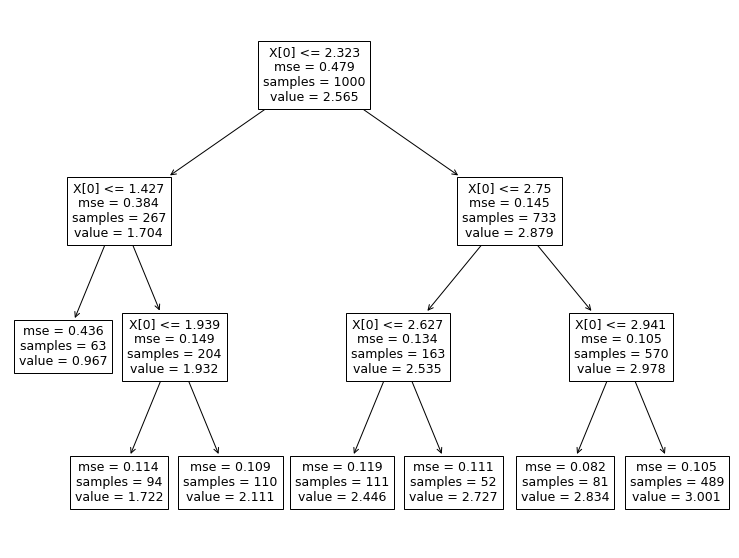

In [32]:
# Look at the tree itself
plt.figure(figsize=(13, 10))
plot_tree(tree2_depth3_minleaf50)

As expected from the previous tree, we fit the same tree but "prune" the far left leaves because it literally can't create a split that results in 50+ sample points (i.e. the node size is less than 2*min_sample_leaf = 100).

### Max leaf nodes

Let's keep the requiring 50 points bit too.

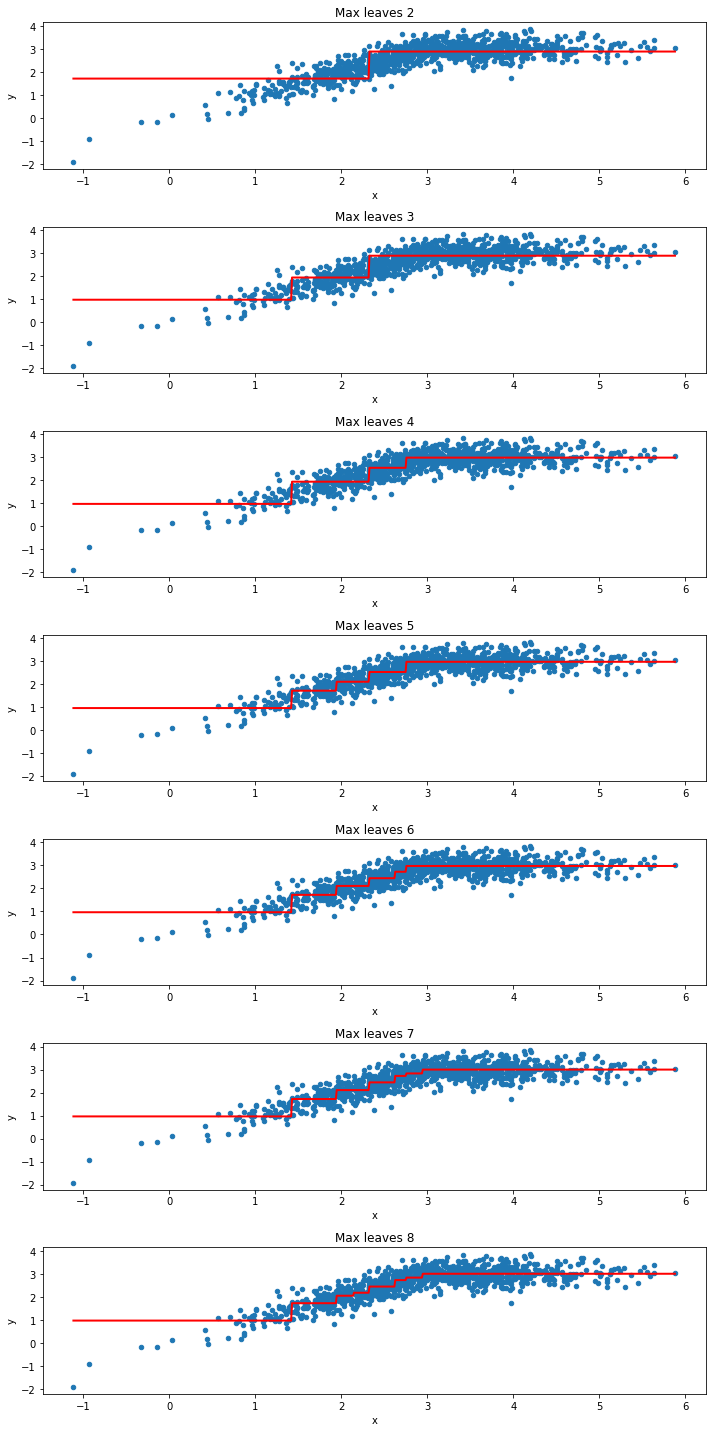

In [33]:
# Run over a mesh from 2 to 8 (inclusive) by 1
mesh = np.arange(2, 9, 1)
fig, axs = plt.subplots(len(mesh), figsize=(10, 20))
trees2 = {}

for i, e in enumerate(mesh):
    loop_tree = DecisionTreeRegressor(
        max_leaf_nodes=e,
        min_samples_leaf=50,
        random_state=666
    ).fit(X, y)
    trees2[e] = loop_tree
    
    # Get predictions
    X_mesh = np.arange(X.min(), X.max(), .01)[:, np.newaxis]
    loop_pred = loop_tree.predict(X_mesh)

    # Plot
    df2.plot('x', 'y', kind='scatter', ax=axs[i])
    axs[i].plot(X_mesh, loop_pred, color='red', linewidth=2)
    axs[i].set_title(f'Max leaves {e}')

plt.tight_layout()
plt.show()

Visually it looks like we split much more in that slope and ignore that right side of the data.  Let's see the actual tree.

[Text(306.9, 489.24, 'X[0] <= 2.323\nmse = 0.479\nsamples = 1000\nvalue = 2.565'),
 Text(111.6, 380.52000000000004, 'X[0] <= 1.427\nmse = 0.384\nsamples = 267\nvalue = 1.704'),
 Text(55.8, 271.8, 'mse = 0.436\nsamples = 63\nvalue = 0.967'),
 Text(167.39999999999998, 271.8, 'X[0] <= 1.939\nmse = 0.149\nsamples = 204\nvalue = 1.932'),
 Text(111.6, 163.08000000000004, 'mse = 0.114\nsamples = 94\nvalue = 1.722'),
 Text(223.2, 163.08000000000004, 'X[0] <= 2.139\nmse = 0.109\nsamples = 110\nvalue = 2.111'),
 Text(167.39999999999998, 54.360000000000014, 'mse = 0.103\nsamples = 56\nvalue = 2.047'),
 Text(279.0, 54.360000000000014, 'mse = 0.108\nsamples = 54\nvalue = 2.177'),
 Text(502.2, 380.52000000000004, 'X[0] <= 2.75\nmse = 0.145\nsamples = 733\nvalue = 2.879'),
 Text(390.59999999999997, 271.8, 'X[0] <= 2.627\nmse = 0.134\nsamples = 163\nvalue = 2.535'),
 Text(334.79999999999995, 163.08000000000004, 'mse = 0.119\nsamples = 111\nvalue = 2.446'),
 Text(446.4, 163.08000000000004, 'mse = 0.111

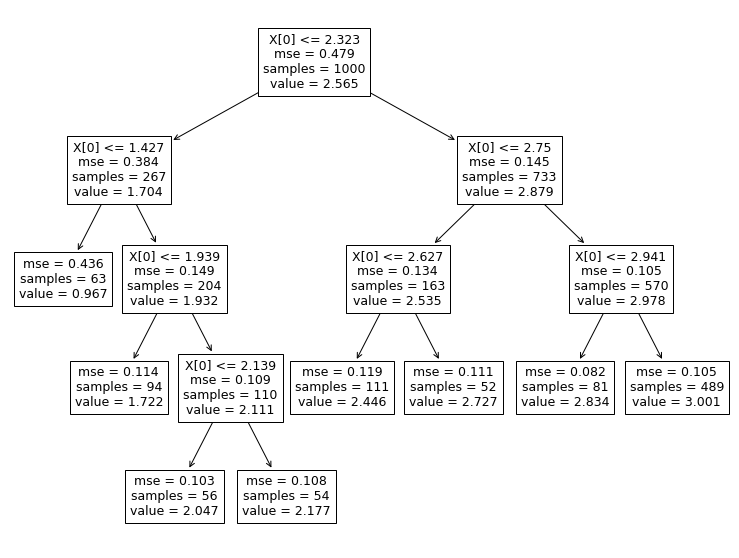

In [34]:
# Look at the tree itself
plt.figure(figsize=(13, 10))
plot_tree(trees2[8])

As we suspected based on the previous trees, we now have something that is asymmetrical.

# Data 3

In [35]:
# Read in
df3 = pd.read_csv('../data/df3.csv')

In [36]:
# Inspect
df3.head()

,x,y
0,3.835354,6.987151
1,2.376280,3.267911
2,3.086790,6.582678
3,1.569807,1.770316
4,0.844609,2.152991


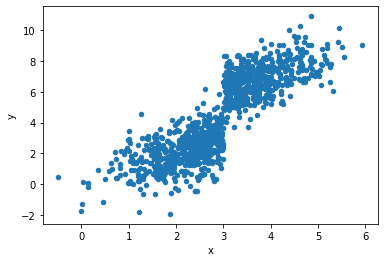

In [37]:
# Plot
df3.plot('x', 'y', kind='scatter')

In [38]:
# Fit simple decision tree with one split
X, y = df3[['x']].to_numpy(), df3['y']
tree3 = DecisionTreeRegressor(
    max_depth=1,
    random_state=666
).fit(X, y)

<Figure size 432x288 with 0 Axes>

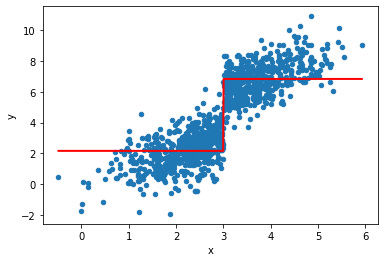

In [39]:
# Visualize
X_mesh = np.arange(X.min(), X.max(), .01)[:, np.newaxis]
y3 = tree3.predict(X_mesh)

plt.figure()
df3.plot('x', 'y', kind='scatter')
plt.plot(X_mesh, y3, color='red',linewidth=2)
plt.show()

As expected, the first split is at the point of discontinuity.  Let's fit depth 3 and see how it evolves.

In [40]:
tree3_depth3 = DecisionTreeRegressor(
    max_depth=3,
    random_state=666
).fit(X, y)

<Figure size 432x288 with 0 Axes>

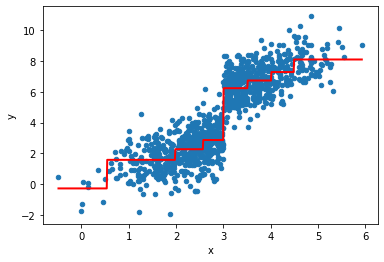

In [41]:
# Visualize
X_mesh = np.arange(X.min(), X.max(), .01)[:, np.newaxis]
y3_depth3 = tree3_depth3.predict(X_mesh)

plt.figure()
df3.plot('x', 'y', kind='scatter')
plt.plot(X_mesh, y3_depth3, color='red',linewidth=2)
plt.show()

[Text(362.7, 475.65000000000003, 'X[0] <= 3.0\nmse = 6.832\nsamples = 1000\nvalue = 4.308'),
 Text(181.35, 339.75, 'X[0] <= 1.984\nmse = 1.435\nsamples = 540\nvalue = 2.157'),
 Text(90.675, 203.85000000000002, 'X[0] <= 0.543\nmse = 1.169\nsamples = 199\nvalue = 1.49'),
 Text(45.3375, 67.94999999999999, 'mse = 0.726\nsamples = 9\nvalue = -0.283'),
 Text(136.0125, 67.94999999999999, 'mse = 1.034\nsamples = 190\nvalue = 1.574'),
 Text(272.025, 203.85000000000002, 'X[0] <= 2.569\nmse = 1.177\nsamples = 341\nvalue = 2.547'),
 Text(226.6875, 67.94999999999999, 'mse = 1.049\nsamples = 180\nvalue = 2.264'),
 Text(317.3625, 67.94999999999999, 'mse = 1.131\nsamples = 161\nvalue = 2.864'),
 Text(544.05, 339.75, 'X[0] <= 4.006\nmse = 1.363\nsamples = 460\nvalue = 6.833'),
 Text(453.375, 203.85000000000002, 'X[0] <= 3.511\nmse = 1.0\nsamples = 307\nvalue = 6.424'),
 Text(408.03749999999997, 67.94999999999999, 'mse = 0.93\nsamples = 188\nvalue = 6.23'),
 Text(498.7125, 67.94999999999999, 'mse = 0.95

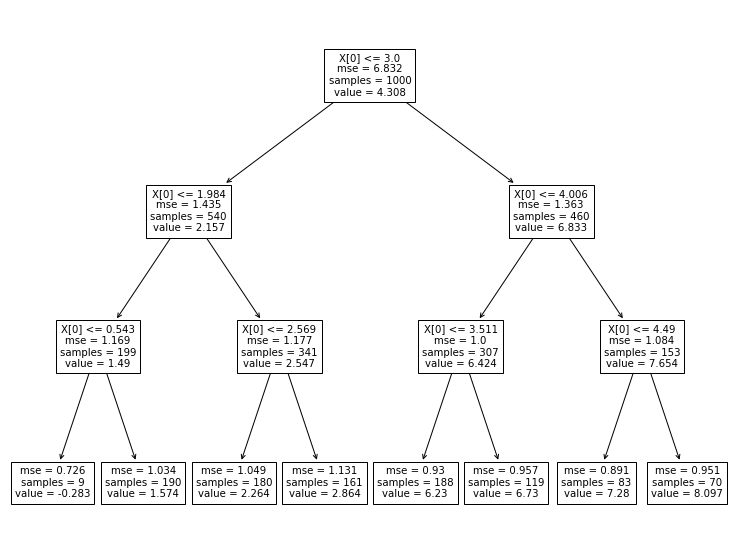

In [42]:
# Look at the tree itself
plt.figure(figsize=(13, 10))
plot_tree(tree3_depth3)

Small sample size on the left, so let's try refitting with 50 min sample size and 8 leaves like we ended on with the previous data set.

In [43]:
tree3_min50_nleaf8 = DecisionTreeRegressor(
    min_samples_leaf=50,
    max_leaf_nodes=8,
    random_state=666
).fit(X, y)

<Figure size 432x288 with 0 Axes>

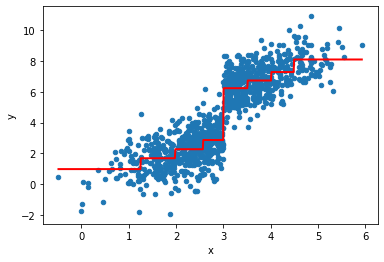

In [44]:
# Visualize
X_mesh = np.arange(X.min(), X.max(), .01)[:, np.newaxis]
y3_min50_nleaf8 = tree3_min50_nleaf8.predict(X_mesh)

plt.figure()
df3.plot('x', 'y', kind='scatter')
plt.plot(X_mesh, y3_min50_nleaf8, color='red',linewidth=2)
plt.show()

[Text(362.7, 475.65000000000003, 'X[0] <= 3.0\nmse = 6.832\nsamples = 1000\nvalue = 4.308'),
 Text(181.35, 339.75, 'X[0] <= 1.984\nmse = 1.435\nsamples = 540\nvalue = 2.157'),
 Text(90.675, 203.85000000000002, 'X[0] <= 1.251\nmse = 1.169\nsamples = 199\nvalue = 1.49'),
 Text(45.3375, 67.94999999999999, 'mse = 1.264\nsamples = 53\nvalue = 0.972'),
 Text(136.0125, 67.94999999999999, 'mse = 1.003\nsamples = 146\nvalue = 1.677'),
 Text(272.025, 203.85000000000002, 'X[0] <= 2.569\nmse = 1.177\nsamples = 341\nvalue = 2.547'),
 Text(226.6875, 67.94999999999999, 'mse = 1.049\nsamples = 180\nvalue = 2.264'),
 Text(317.3625, 67.94999999999999, 'mse = 1.131\nsamples = 161\nvalue = 2.864'),
 Text(544.05, 339.75, 'X[0] <= 4.006\nmse = 1.363\nsamples = 460\nvalue = 6.833'),
 Text(453.375, 203.85000000000002, 'X[0] <= 3.511\nmse = 1.0\nsamples = 307\nvalue = 6.424'),
 Text(408.03749999999997, 67.94999999999999, 'mse = 0.93\nsamples = 188\nvalue = 6.23'),
 Text(498.7125, 67.94999999999999, 'mse = 0.95

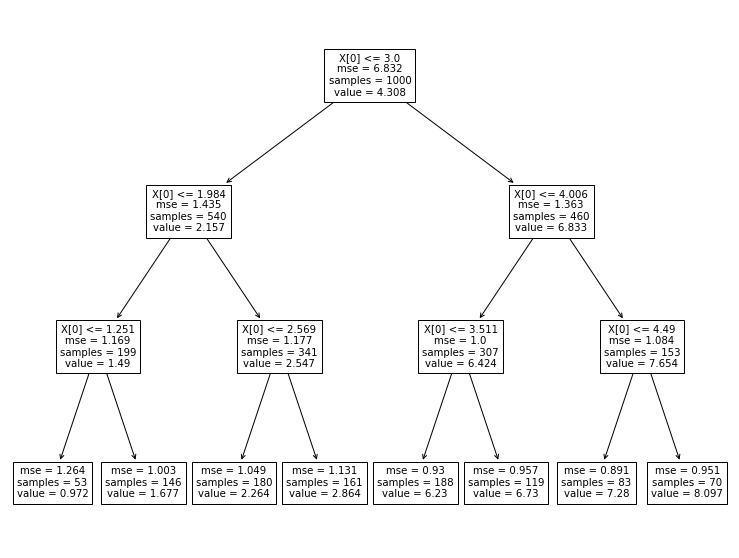

In [45]:
# Look at the tree itself
plt.figure(figsize=(13, 10))
plot_tree(tree3_min50_nleaf8)

In this case the tree stays symmetric, but the left-most node has been modified to maintain out sample size.  Which makes sense do the symmetric nature of this data set and the lines on either side of the discontinuity.  It seems like we could reasonably improve the fit by increasing the number of leaves to better approximate the lines, but let's stop here.

# Data 4

In [46]:
# Read in
df4 = pd.read_csv('../data/df4.csv')

In [47]:
# Inspect
df4.head()

,x,y
0,B,3.240492
1,B,3.177085
2,A,-0.755100
3,A,0.651925
4,A,0.749837


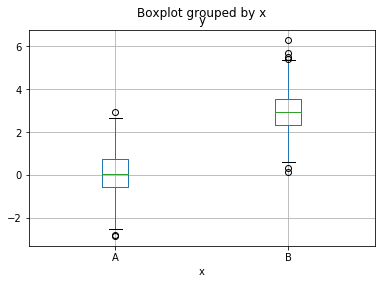

In [48]:
# Plot
df4.boxplot('y', by='x')

Categorical variables, at least in scikit and most other popular tree APIs, need to be coded up to be numeric matrices in order for trees to work.  If we just pass in information as is we'll get an error.

In [49]:
# Fit simple decision tree with one split
X, y = df4[['x']].to_numpy(), df4['y']
tree4 = DecisionTreeRegressor(
    max_depth=1,
    random_state=666
).fit(X, y)

ValueError: could not convert string to float: 'B'

So here, let's just one-hot encode `x`, which is basically the same thing that regression needed to do as well.

One easy way to do it (but might not extend well to new data) is using `pd.get_dummies`.

In [ ]:
# Inspect what this does
pd.get_dummies(df4, prefix='x')

Technically we only need one of `x_A` and `x_B` because they contain the same information and just have 0s and 1s inverted.  So let's just use `x_A`.

In [ ]:
# Fit simple decision tree with one split
X, y = pd.get_dummies(df4, prefix='x')[['x_A']].to_numpy(), df4['y']
tree4 = DecisionTreeRegressor(
    max_depth=1,
    random_state=666
).fit(X, y)

In [ ]:
# Look at the tree itself
plt.figure(figsize=(8, 5))
plot_tree(tree4)

Does increasing the tree size do anything here?  Nope, because we only have two values to split on!

In [ ]:
# Let's try just to see
plt.figure(figsize=(8, 5))
plot_tree(DecisionTreeRegressor(
    max_depth=2,
    random_state=666
).fit(X, y))

Not much else to see here.